## Project Goal
The goal of this exercise is to analyze a dataset consisting of information from 400 credit card holders and predict the average credit card balance of a given individual. Such an exercise could be conducted as part of a customer analysis within a credit card company. The results of the analysis could determine which customers present a risk of credit default, or what the expected consumer behavior of prospective customers will be. 

Dataset : "Credit.csv"




### Dataset description
The dataset has 400 observations with the following variables:
- ID : Identification
- Income : Income in \\$1,00,000
- Limit : credit limit
- Rating : credit rating
- Cards : number of cards
- Age : age in years
- Education : number of years of education
- Gender : Male or Female
- Student : Yes or No
- Married : Yes or No
- Ethnicity : African American, Asian or Caucasian
- Balance : average monthly credit card balance across all cards owned by the customer in $



In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

#### Load and visualize the dataset.

In [4]:
# loading the data
data = pd.read_csv('credit.csv',index_col = 0)
# visualizing the dataset
data.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
# Available features
print("The available columns are, :")
print(data.columns)

The available columns are, :
Index(['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')


In [7]:
# Removing ID column
data.drop(['ID'],axis = 1,inplace = True)
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [18]:
# description about data and to see, if there are any missing values
data.info()
print()
print("No null values")

# statistics of numeric features
print("\n Data description for \"Numeric Features\" ")
data.describe()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB

No null values

 Data description for "Numeric Features" 


,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [19]:
# statistics of categorical features
print("\n Data description for \"Categorical Features\"")
data.describe(include = np.object)


 Data description for "Categorical Features"


,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


## Visualization of Dataset

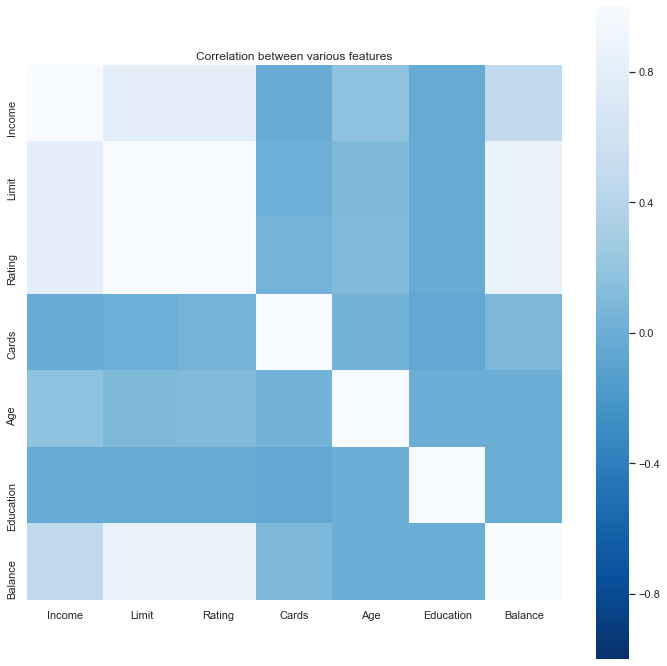

In [32]:
# visualization of dataset
correlation_matrix = data.corr()
# plotting correlations
plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix,vmin = -1,vmax = 1,cmap = plt.cm.Blues_r,square = True)
plt.title("Correlation between various features")
plt.colorbar
plt.show()


<Figure size 432x288 with 0 Axes>

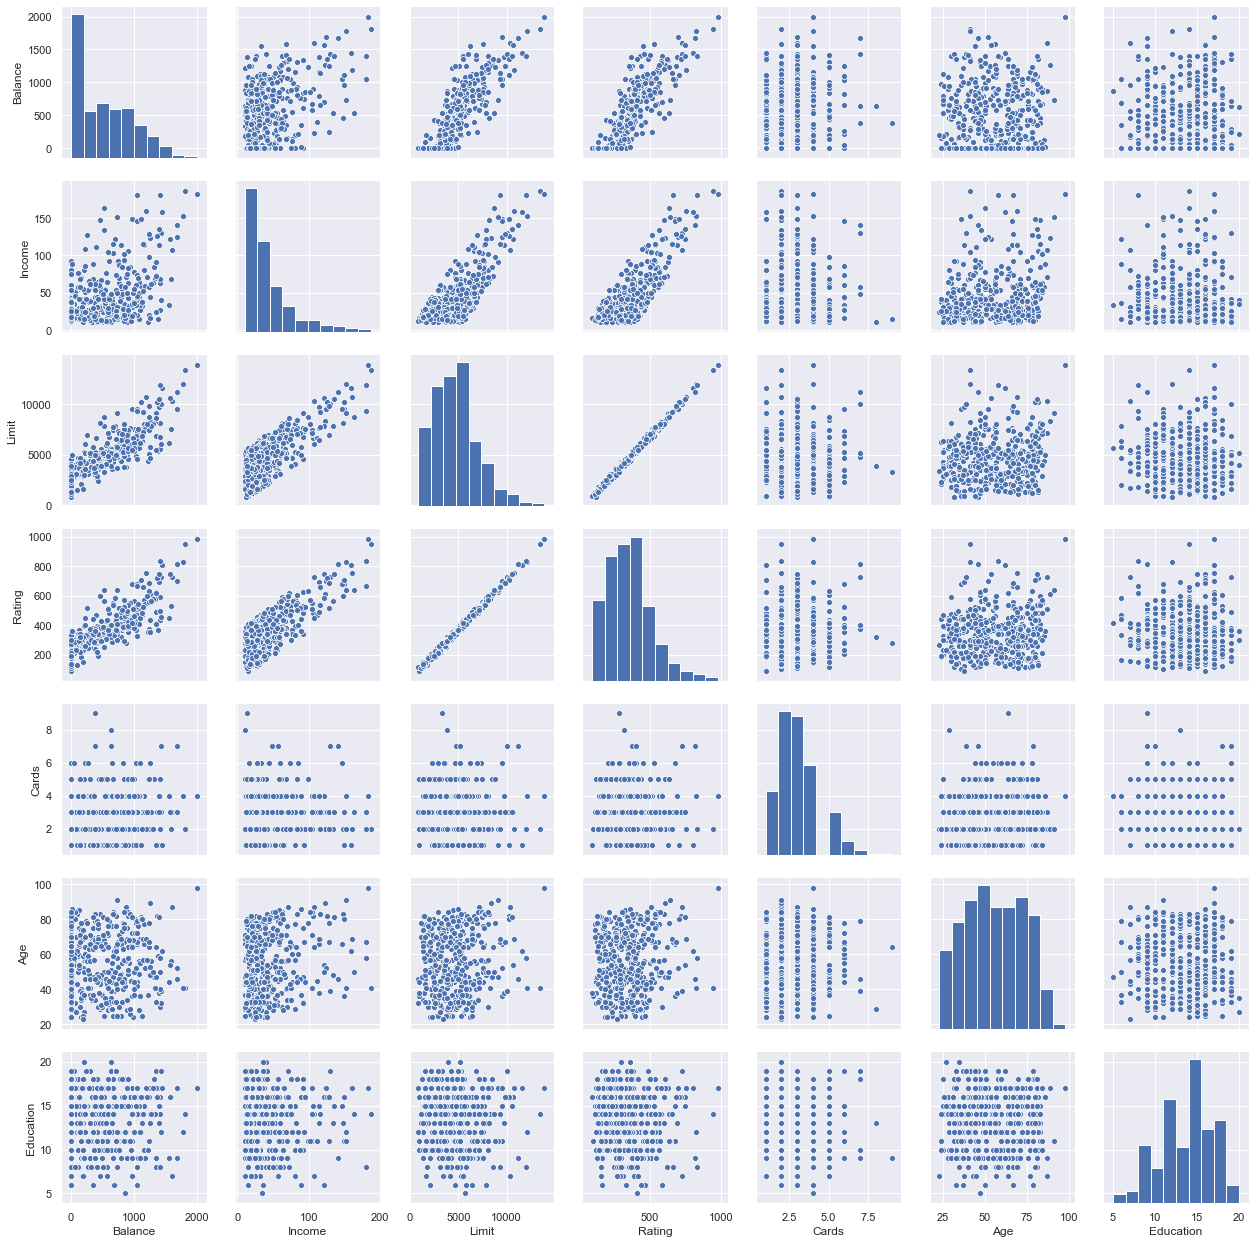

In [31]:
# Scatterplots between 'balance' and other features
plt.figure()
sns.set()
cols = ['Balance', 'Income','Limit', 'Rating','Cards','Age','Education']
sns.pairplot(data[cols])
plt.show()

## Observation 
- From the plot, we observe that Limit, Rating and Income are correlating well with Balance.
- There is a high correlation between, Limit and Rating. So using both of them may be redundant.

#### Explore various encoding methodologies for categorical variables. (One-Hot and Binary encoding).

In [52]:
X_df = data.drop(['Balance'], axis = 1)
Y_df = data['Balance']
# one-hot encoding for all the categorical variables
X_df = pd.get_dummies(data = X_df)
#print(X_df_names)
X_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,0,1,1,0,0,1,0,0,1
2,106.025,6645,483,3,82,15,1,0,0,1,0,1,0,1,0
3,104.593,7075,514,4,71,11,0,1,1,0,1,0,0,1,0
4,148.924,9504,681,3,36,11,1,0,1,0,1,0,0,1,0
5,55.882,4897,357,2,68,16,0,1,1,0,0,1,0,0,1


#### Center and standardize the data.
- Why is centering (zero mean) and standardizing (unit variance) of data necessary? 
- Are the ridge regression and standard least squares coefficient estimates scale invariant? Here scale invariance implies that multiplying a predictor by a constant $c$   leads to scaling of coefficient estimates by a factor of 1/ $c$ . 

## Answers
### Why Centering and standardizing ?
- Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

### Scale invariance
- Standard least squares regression is scale invariant.
- Ridge regression is not scale invariant.

In [37]:
# centering and standardizing the data
s = StandardScaler()
X_std = s.fit_transform(X_df)

#### Split dataset into training and validation set (80:20)

In [38]:
X_train_std, X_test_std, Y_train, Y_test = train_test_split(X_std,Y_df,test_size = 0.2)

#### Use linear regression. 
- Report training and validation error. 

In [39]:
# Applying linear regression
lr = LinearRegression()
lr.fit(X_train_std,Y_train)

# calculating training error
Y_pred_train = lr.predict(X_train_std)
train_mse = mean_squared_error(Y_train, Y_pred_train)

# calculating testing error
Y_pred_test = lr.predict(X_test_std)
test_mse = mean_squared_error(Y_test, Y_pred_test)

# displaying
print("The training error is : {}\n".format(train_mse))
print("The validation error is : {}\n".format(test_mse))

The training error is : 8681.891892803073

The validation error is : 13223.129944223136



#### Use ridge regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

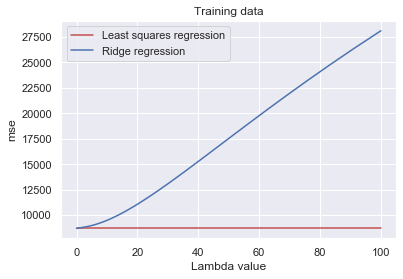

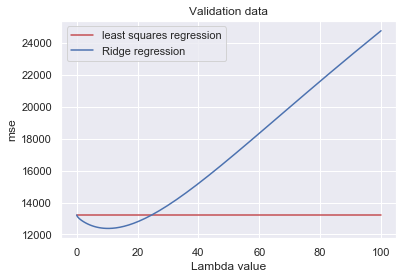

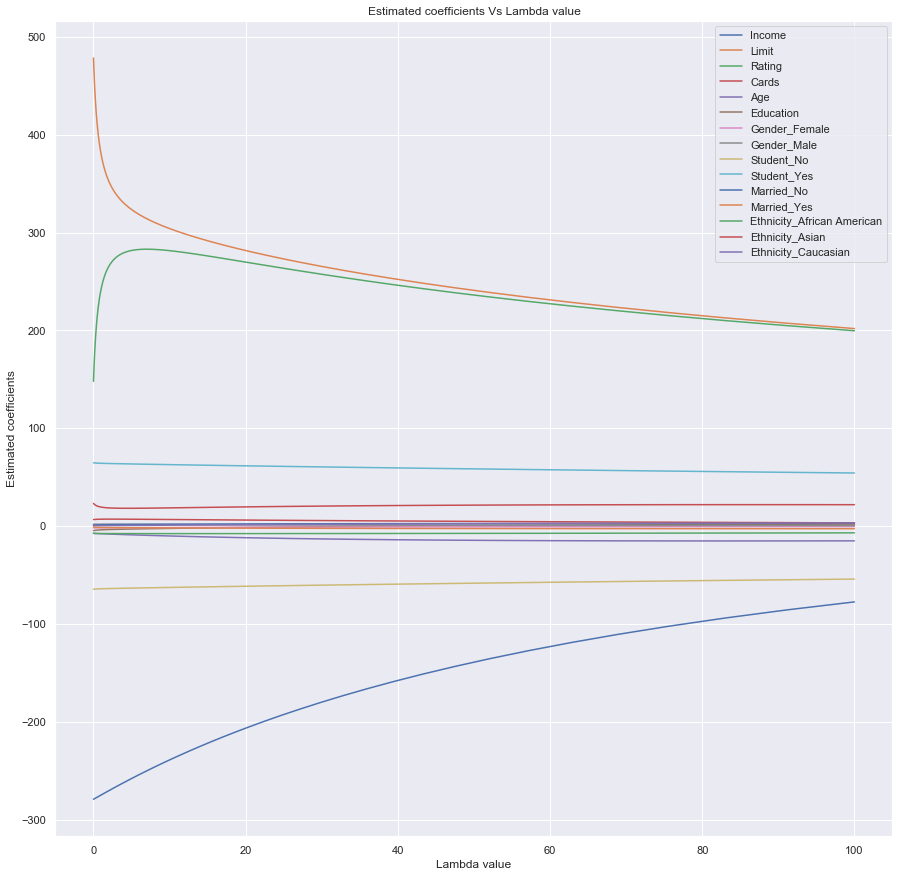

optimal lambda value : 10.722672220103243



In [63]:
lamda_range = np.logspace(-2,2,100)
#lamda_range = [1e-9,1e-7,1e-5,1e-3,1e-1,1.0,1e1,1e3,1e5,1e7]
ridge_train_mse = []
ridge_valid_mse = []
Ridge_coeff = np.array([])
# for implementing grid search to find optimal lambda
best_lambda = lamda_range[0]     # initializing
best_mse = 1e15                  # very large number
for lamda in lamda_range:    
    # fitting the ridge model
    Ridge_reg = Ridge(alpha = lamda)
    Ridge_reg.fit(X_train_std, Y_train)
    # appending mse for train data, lasso regression
    ridge_train_mse.append(mean_squared_error(Y_train,Ridge_reg.predict(X_train_std)))
    # appending mse for validation data, lasso regression
    ridge_valid_mse.append(mean_squared_error(Y_test,Ridge_reg.predict(X_test_std)))
    # updating best lambda
    if(mean_squared_error(Y_test,Ridge_reg.predict(X_test_std)) < best_mse):
        best_mse = mean_squared_error(Y_test,Ridge_reg.predict(X_test_std))
        best_lambda = lamda
    # coefficients
    Ridge_coeff = np.append(Ridge_coeff,Ridge_reg.coef_[:,None])

    
# for training mse
plt.figure()
plt.plot(lamda_range,[train_mse]*len(lamda_range), label="Least squares regression", color = 'r')
plt.plot(lamda_range,ridge_train_mse, label="Ridge regression", color = 'b')

plt.legend()
plt.xlabel('Lambda value')
plt.ylabel('mse')
plt.title("Training data")
plt.show()

# for ridge regression
plt.figure()
plt.plot(lamda_range,[test_mse]*len(lamda_range), label="least squares regression", color = 'r')
plt.plot(lamda_range,ridge_valid_mse, label="Ridge regression", color = 'b')
plt.legend()
plt.xlabel('Lambda value')
plt.ylabel('mse')
plt.title("Validation data")
plt.show()

# for plotting coeff Vs lambda
Ridge_coeff = Ridge_coeff.reshape((100,15))
plt.figure(figsize=(15,15))
X_df_names = X_df.columns    # column names after one hot encoding
for i in range(len(X_df_names)):
    plt.plot(lamda_range,Ridge_coeff[:,i], label = X_df_names[i])
plt.xlabel('Lambda value')
plt.ylabel("Estimated coefficients")
plt.title("Estimated coefficients Vs Lambda value")
plt.legend()
plt.show()

# displaying optimal lambda
print("optimal lambda value, using Ridge regression : {}\n".format(best_lambda))

####   Use lasso regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

In [ ]:
lamda_range = np.logspace(-2,2,100)
#lamda_range = [1e-9,1e-7,1e-5,1e-3,1e-1,1.0,1e1,1e3,1e5,1e7]
Lasso_train_mse = []
Lasso_valid_mse = []
Lasso_coeff = np.array([])
# for implementing grid search to find optimal lambda
best_lambda = lamda_range[0]     # initializing
best_mse = 1e15                  # very large number
for lamda in lamda_range:    
    # fitting the ridge model
    Lasso_reg = Lasso(alpha = lamda)
    Lasso_reg.fit(X_train_std, Y_train)
    # appending mse for train data, lasso regression
    Lasso_train_mse.append(mean_squared_error(Y_train,Ridge_reg.predict(X_train_std)))
    # appending mse for validation data, lasso regression
    Lasso_valid_mse.append(mean_squared_error(Y_test,Ridge_reg.predict(X_test_std)))
    # updating best lambda
    if(mean_squared_error(Y_test,Ridge_reg.predict(X_test_std)) < best_mse):
        best_mse = mean_squared_error(Y_test,Ridge_reg.predict(X_test_std))
        best_lambda = lamda
    # coefficients
    Ridge_coeff = np.append(Ridge_coeff,Ridge_reg.coef_[:,None])

    
# for training mse
plt.figure()
plt.plot(lamda_range,[train_mse]*len(lamda_range), label="Least squares regression", color = 'r')
plt.plot(lamda_range,ridge_train_mse, label="Ridge regression", color = 'b')

plt.legend()
plt.xlabel('Lambda value')
plt.ylabel('mse')
plt.title("Training data")
plt.show()

# for ridge regression
plt.figure()
plt.plot(lamda_range,[test_mse]*len(lamda_range), label="least squares regression", color = 'r')
plt.plot(lamda_range,ridge_valid_mse, label="Ridge regression", color = 'b')
plt.legend()
plt.xlabel('Lambda value')
plt.ylabel('mse')
plt.title("Validation data")
plt.show()

# for plotting coeff Vs lambda
Ridge_coeff = Ridge_coeff.reshape((100,15))
plt.figure(figsize=(15,15))
X_df_names = X_df.columns    # column names after one hot encoding
for i in range(len(X_df_names)):
    plt.plot(lamda_range,Ridge_coeff[:,i], label = X_df_names[i])
plt.xlabel('Lambda value')
plt.ylabel("Estimated coefficients")
plt.title("Estimated coefficients Vs Lambda value")
plt.legend()
plt.show()

# displaying optimal lambda
print("optimal lambda value, using Ridge regression : {}\n".format(best_lambda))

#### Observations and Inferences:
- Observe and explain the difference in the behaviour of lasso and ridge coefficients as $\lambda$ increases.
- Briefly explain which of Lasso and Ridge regression would perform better in terms of validation error and the interpretability of developed models in the the following cases:
    - The output response is related to almost all predictors.
    - The output response is only related to let's say, 6 out of 40 predictors.
- List out the features selected by Lasso regression for the optimal value of $\lambda$.

#### Bonus (Optional) : 
- Try out Best Subset Selection, Forward Stepwise Selection, Backward Stepwise Selection and Recursive Feature Elimination for feature selection. Compare the selected features, validation error and computational complexity for the above with Lasso/Ridge regression.
- Use elastic net regression and compare validation error with ridge and lasso regession.